# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), și [sounddevice](https://python-sounddevice.readthedocs.io/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Generarea unui semnal sinusoidal

Întâi trebuie să definim parametrii sinusoidei continuue:

* orizontul de timp ($t$)
* frecvența semnalului original ($f_0$)
* amplitudinea ($A$)
* faza ($\varphi$)

In [3]:
time_of_view = 1     # s
frequency = 2        # Hz
amplitude = 1
phase = 0

Iar apoi parametrii de măsurare, sinusoida discretizată:
* frecvența de eșantionare ($f_s$)
* perioada de eșantionare ($t_s$)
* numărul de eșantionare ($n$)

In [4]:
sampling_rate = 12    # Hz
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period

Cu datele de mai sus putem genera orizontul de timp cu momentele de interes pentru semnalul continuu și cel discretizat ($t$, respectiv $nt_s$):

In [5]:
atime = np.linspace (0, time_of_view, int(10e5 + 1)) # s.
time = np.linspace (0, time_of_view, int(n_samples + 1))

*Observație*: orizontul de timp continuu (analog) este de fapt un orizont de timp discret ($nt_s$) foarte dens ($n=10^5$ eșantione).

Cu aceste date putem crea o funcție sinus ce generează sinusoidele parametrizate conform variabilelor de mai sus:

In [4]:
def sine (amplitude, frequency, time, phase):
    return amplitude * np.sin (2 * np.pi * frequency * time + phase)

## Sinusoidă continuă
Pentru a obține o sinusoidă "continuă" putem apela funcția ```sine```:

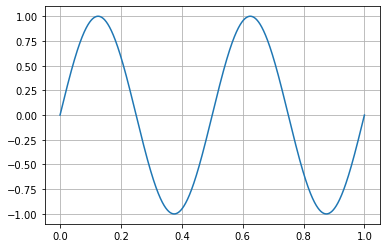

In [7]:
asignal = sine(amplitude, frequency, atime, phase)

plt.grid(True)
plt.plot (atime, asignal)
plt.show()

## Sinusoidă discretizată
Discretizarea se obține apelând aceiași funcție ```sine``` dar cu parametrii discreți și folosind ```stem``` pentru a obține cele $n$ eșantioane:

<StemContainer object of 3 artists>

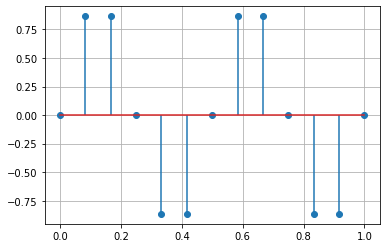

In [8]:
signal = sine(amplitude, frequency, time, phase)

plt.grid(True)
plt.stem (time, signal)

# Producerea și audiția unui ton

Pentru a produce o sinusoidă ce poate fi percepută de urechea umană trebuie să creștem frecvența și amplitudinea acesteia.

În exemplul de mai jos generăm o sinusoidă de frecvență $f_0=440\text{Hz}$ și amplitudine $10.000$ pe care o discretizăm cu frecvența de eșantionare $f_s=44.100\text{Hz}$ pe un orizont de timp de $2\text{s}$.

In [6]:
time_of_view = 1     # s
frequency = 440      # Hz
amplitude = 10000
phase = 0

notes = [440,493,523,587,660,700,783,880]

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))
for freq in notes:
	tone = sine(amplitude, freq, time, phase)
	# play_tone(tone)

In [15]:
time =np.linspace(0, time_of_view, int(n_samples + 1))
sampling_rate = 44100
note = 400
tone = sine(amplitude, note, time, phase)
play_tone(tone*np.exp(-10*time))

Aceast ton îl vom discretiza cu o frecvență de eșantionare $f_s$ conform ```sampling_rate``` și îl vom transforma în formatul WAV prin conversia eșantioanelor la întregi pe 16-biți:

In [8]:
def play_tone (tone):
	sd.play (tone, sampling_rate)
	sd.wait()
# sd.default.samplerate = sampling_rate
# wav_wave = np.array(tone, dtype=np.int16)
# sd.play(wav_wave, blocking=True)
# sd.stop()

In [17]:
from scipy import signal
#generate scale of music tones
notes = [440,493,523,587,660,700,783,880]
#          A   B   C   D   E   F   G   A
A=440
B=493
C=523
D=587
E=660
F=700
G=783
A_=880
#play frere jacues
frere_jacques = [
	(E,3),(F,2),(G,1),(E,3),(F,2),(G,1)
]

melodie = []

# for freq in frere_jacques:
	# melodie.append(sine(amplitude, freq[0], time/freq[1], phase))

melodie.append(sine(amplitude, 440, time, phase))
melodie[0] += sine(0.2*amplitude, 660, time, phase)

melodie = np.concatenate(melodie)
#apply sawtooth
melodie = melodie * signal.sawtooth(2 * np.pi * 5 * 1)

play_tone(melodie)

In [12]:
samplerate = 44100
def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave

In [13]:
from pprint import pprint

def get_piano_notes():
    '''
    Returns a dict object for all the piano 
    note's frequencies
    '''
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 261.63 #Frequency of Note C4
    
    note_freqs = {octave[i]: base_freq * pow(2,(i/12)) for i in range(len(octave))}        
    note_freqs[''] = 0.0 # silent note
    
    return note_freqs
  
# To get the piano note's frequencies
note_freqs = get_piano_notes()


In [18]:
import numpy as np

def get_song_data(music_notes):
    '''
    Function to concatenate all the waves (notes)
    '''
    note_freqs = get_piano_notes() # Function that we made earlier
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

# music_notes = 'C-C-G-G-A-A-G--F-F-E-E-D-D-C--G-G-F-F-E-E-D--G-G-F-F-E-E-D--C-C-G-G-A-A-G--F-F-E-E-D-D-C'
music_notes = 'C-D-E-C-C-D-E-C--E-F-G-E-F-G--G-A-G-F-E-C-G-A-G-F-E-C--C-G-C-C-G-C'
data = get_song_data(music_notes)

data = data * (16300/np.max(data)) # Adjusting the Amplitude (Optional)

#sawtooth
def sawtooth(amplitude, frequency, time, phase):
    return amplitude * (2 * np.pi * frequency * time + phase)

NameError: name 'get_piano_notes' is not defined

In [26]:
play_tone(data)

In [27]:
#apply sawtooth filter


# Sarcini

1. [8p] Scrieți tonurile pentru notele muzicale Do, Re, Mi, Fa, Sol, La, Si, Do.

2. [8p] Compuneți un cântec simplu clasic (ex. Frère Jacques) într-un singur semnal.

3. [4p] Citiți o partitură la intrare (folosind [LilyPond](https://lilypond.org/) sau formatul propriu) și produceți semnalul ce conține melodia la ieșire prin compunerea tonurilor asociate notelor automat.